In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time

## Global parameters

In [2]:
# Transparency of Histograms
transp = 0.5

# If true will plot Zbb sample for signal
isZbb = False

# apply mass cut and save to separate files
applyMassCut = True

# create npz files with only images and labels
imagesOnly = False


In [3]:
# Set default options for paper
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white'}
plt.rcParams.update(params)
plt.style.context('default')

In [4]:
starttime = time.time()

In [5]:
feature_names = {'jetconstPt_log': r'$log(p_T)$',
                'jetconstEta_abs': r'$|\eta|$',
                'jetconstE_log': r'$log(E)$',
                'jetconstPt_Jetlog': r'$log(p_T / p_{T}_{jet}$',
                'jetMass': r'$m_{jet}$',
                'jetMassSD': r'$m_{jet, sd}$',
                'deltaR_subjets': r'$\Delta R_{subjets}$',
                'jetPt': r'$p_{T}_{jet}$',
                'z': r'$p_{T}_{subjet0} / \Sigma  p_{T}_{subjets}$',
                'tau1_b05': r'$\tau_{1}^{(0.5)}$',
                'tau2_b05': r'$\tau_{2}^{(0.5)}$',
                'tau3_b05': r'$\tau_{3}^{(0.5)}$',
                'tau1_sd_b05': r'$\tau_{1,sd}^{(0.5)}$',
                'tau2_sd_b05': r'$\tau_{2,sd}^{(0.5)}$',
                'tau3_sd_b05': r'$\tau_{3,sd}^{(0.5)}$',
                'tau1_b10': r'$\tau_{1}^{(1)}$',
                'tau2_b10': r'$\tau_{2}^{(1)}$',
                'tau3_b10': r'$\tau_{3}^{(1)}$',
                'tau1_sd_b10': r'$\tau_{1,sd}^{(1)}$',
                'tau2_sd_b10': r'$\tau_{2,sd}^{(1)}$',
                'tau3_sd_b10': r'$\tau_{3,sd}^{(1)}$',
                'tau1_b15': r'$\tau_{1}^{(1.5)}$',
                'tau2_b15': r'$\tau_{2}^{(1.5)}$',
                'tau3_b15': r'$\tau_{3}^{(1.5)}$',
                'tau1_sd_b15': r'$\tau_{1,sd}^{(1.5)}$',
                'tau2_sd_b15': r'$\tau_{2,sd}^{(1.5)}$',
                'tau3_sd_b15': r'$\tau_{3,sd}^{(1.5)}$',
                'tau1_b20': r'$\tau_{1}^{(2)}$',
                'tau2_b20': r'$\tau_{2}^{(2)}$',
                'tau3_b20': r'$\tau_{3}^{(2)}$',
                'tau1_sd_b20': r'$\tau_{1,sd}^{(2)}$',
                'tau2_sd_b20': r'$\tau_{2,sd}^{(2)}$',
                'tau3_sd_b20': r'$\tau_{3,sd}^{(2)}$',
                'charge': r'$q$',
                'isEle': r'$isEle$',
                'isPho': r'$isPho$',
                'isMuon': r'$isMuon$',
                'isCh': r'$isCh$',
                'isNh': r'$isNh$',
                'delta_eta': r'$\Delta \eta$',
                'delta_phi': r'$\Delta \phi$',
                'deltaR_jet': r'$\Delta R_{jet}$',
                'deltaR_subjet0': r'$\Delta R_{subjet0}$',
                'deltaR_subjet1': r'$\Delta R_{subjet1}$',
                'jetpull': r'$\Phi_{pull}$',
                'dxy': r'$d_{xy}$',
                'dz': r'$d_{z}$',
                'jetEta': r'$\eta_{jet}$',
                'jetPhi': r'$\phi_{jet}$',
                'chMult': r'$N_{CH}$',
                'neutMult': r'$N_{NH}$',
                'phoMult': r'$N_{\gamma}$',
                'eleMult': r'$N_{e}$',
                'muMult': r'$N_{\mu}$',
                'beta3': r'$\beta_{3}$',
                'beta3_sd': r'$\beta_{3, sd}$',
                'tau21': r'$\tau_{2}^{1} / \tau_{1}^{1}$',
                'dxy_max': r'$d_{xy\ max}$',
                'dz_max': r'$d_{z \max}$',}

In [6]:
fromShowJetsFile = []
fromConstituentsFile = []

In [7]:
if(imagesOnly):
    fromShowJetsFile = ['jetImages', 'jetMassSD', 'labels']

else:

    fromShowJetsFile = [
#         'jetImages',
        'jetPt',
        'jetEta',
        'jetPhi',
        'jetMass',
        'jetMassSD',
        'deltaR_subjets',
        'z',
        'tau1_b05',
        'tau2_b05',
        'tau3_b05',
        'tau1_sd_b05',
        'tau2_sd_b05',
        'tau3_sd_b05',
        'tau1_b10',
        'tau2_b10',
        'tau3_b10',
        'tau1_sd_b10',
        'tau2_sd_b10',
        'tau3_sd_b10',
        'tau1_b15',
        'tau2_b15',
        'tau3_b15',
        'tau1_sd_b15',
        'tau2_sd_b15',
        'tau3_sd_b15',
        'tau1_b20',
        'tau2_b20',
        'tau3_b20',
        'tau1_sd_b20',
        'tau2_sd_b20',
        'tau3_sd_b20',
        'chMult',
        'neutMult',
        'phoMult',
        'eleMult',
        'muMult',
        'jetpull',
        'labels'
    ]


    fromConstituentsFile = [
        'jetconstPt_log',
        'jetconstEta_abs',
        'jetconstE_log',
        'jetconstPt_Jetlog',
        'charge',
        'isEle',
        'isPho',
        'isMuon',
        'isCh',
        'isNh',
        'delta_eta',
        'delta_phi',
        'deltaR_jet',
        'deltaR_subjet0',
        'deltaR_subjet1',
        'dxy',
        'dz'
    ]


## Define Functions

In [8]:
def Draw_HistoGram(data_sig, data_bkg, feat,bins,minx,maxx, legend_loc = 'best'):

    
    tick_width = (maxx-minx)/5
    ii = feat_all.index(feat)
    fig, axs = plt.subplots(1, 1, tight_layout=True,figsize=(7.5,7.5))
    data_sig = data_sig[feat]#[ind_sig].flatten()
    data_bkg = data_bkg[feat]#[ind_bkg].flatten()
#     data_test_sig = data_test[feat][ind_test_sig].flatten()
#     data_test_bkg = data_test[feat][ind_test_bkg].flatten()
    axs.hist(data_sig,
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_sig))/len(data_sig),
                fill = True,
                alpha = 0.55,
                label = 'Signal',
                log = False,
#                density = True,
                range = [minx,maxx],
                hatch = '/',
                edgecolor='k'
                );    
    axs.hist(data_bkg,
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_bkg))/len(data_bkg),
                fill = True,
                alpha = 0.55,
                label = 'Background',
                log = False,
#                density = True,
                range = [minx,maxx],
                hatch = '\\',
                edgecolor='k'
                );
    axs.legend(loc = legend_loc);
    axs.set_xlim(minx,maxx)
    axs.xaxis.set_ticks(np.arange(minx, maxx + tick_width, tick_width))
    axs.set_xlabel('Normalized ' + feature_names[feat])
    axs.set_ylabel('Fraction')

    plt.savefig(feat + '.png')

## Import data:
Using ShowJetsData_full.npz to build the CNN.

Combine QCD npz files

Combine Zbb npz files

In [9]:


if(imagesOnly):

    inputfile_exts = {

                  'QCD':'_addmoretaus_withbs_QCD_images.npz',

                  'Zbb':'_addmoretaus_withbs_Zbb_images.npz',
                 }

else:
    
    inputfile_exts = {

                      'QCD':'_addmoretaus_withbs_QCD_exts.npz',

                      'Zbb':'_addmoretaus_withbs_Zbb_exts.npz',

                     }



filetypes = ['QCD','Zbb']

Showjets_files = [np.load('/mnt/data/ml/ShowJetsData'+inputfile_exts[ext]) for ext in inputfile_exts.keys()]
Constituent_files = [np.load('/mnt/data/ml/Constituent4vec'+inputfile_exts[ext]) for ext in inputfile_exts.keys()]


In [10]:
for ext in inputfile_exts.keys():
    print('/mnt/data/ml/ShowJetsData'+inputfile_exts[ext])
    
    
for key, file in zip(filetypes, Showjets_files):
    print(key, file['jetMassSD'].shape[0])

/mnt/data/ml/ShowJetsData_addmoretaus_withbs_QCD_exts.npz
/mnt/data/ml/ShowJetsData_addmoretaus_withbs_Zbb_exts.npz
QCD 7436074
Zbb 1901356


# Input Distributions

In [11]:
feat_all = fromShowJetsFile + fromConstituentsFile

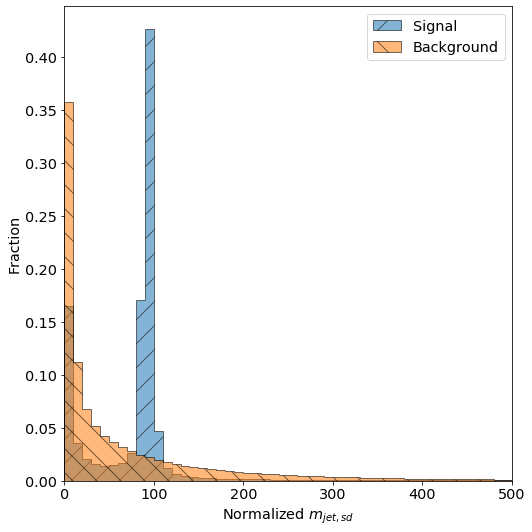

In [12]:
Draw_HistoGram(Showjets_files[1], Showjets_files[0], 'jetMassSD',50,0,500)


In [ ]:
data_dic  = {sample: {feat : data[feat]  for feat in fromConstituentsFile} for sample, data in zip(filetypes, Constituent_files)}
data_dic2 = {sample: {feat : data[feat]  for feat in fromShowJetsFile} for sample, data in zip(filetypes, Showjets_files)}





```array([5.82069588, 5.48169994, 5.42591953, 5.42098475, 5.19779348,
       5.19154167, 4.96679068, 4.89038801, 4.85686445, 4.84155321,
       4.21172714, 4.03859472, 3.98107576, 3.67381763, 3.55293584,
       3.55252504, 3.50937724, 3.46419692, 2.76884317, 2.76539183])
       ```

In [ ]:
for key in data_dic.keys():
    data_dic[key].update(data_dic2[key])

In [ ]:
del Showjets_files
del Constituent_files

In [ ]:
n_data = len(data_dic['QCD']['labels'])

In [ ]:
firstSample = [key for key in data_dic.keys()][0]

In [ ]:
if(not imagesOnly):

    dxy_min = []
    dz_min = []
    dxymax_min = []
    dzmax_min = []

    for key in data_dic.keys():

        # Normalize tau's
        data_dic[key]['tau1_b05'] = data_dic[key]['tau1_b05']/data_dic[key]['jetPt']
        data_dic[key]['tau2_b05'] = data_dic[key]['tau2_b05']/data_dic[key]['jetPt']
        data_dic[key]['tau3_b05'] = data_dic[key]['tau3_b05']/data_dic[key]['jetPt']
        data_dic[key]['tau1_sd_b05'] = data_dic[key]['tau1_sd_b05']/data_dic[key]['jetPt']
        data_dic[key]['tau2_sd_b05'] = data_dic[key]['tau2_sd_b05']/data_dic[key]['jetPt']
        data_dic[key]['tau3_sd_b05'] = data_dic[key]['tau3_sd_b05']/data_dic[key]['jetPt']
        data_dic[key]['tau1_b10'] = data_dic[key]['tau1_b10']/data_dic[key]['jetPt']
        data_dic[key]['tau2_b10'] = data_dic[key]['tau2_b10']/data_dic[key]['jetPt']
        data_dic[key]['tau3_b10'] = data_dic[key]['tau3_b10']/data_dic[key]['jetPt']
        data_dic[key]['tau1_sd_b10'] = data_dic[key]['tau1_sd_b10']/data_dic[key]['jetPt']
        data_dic[key]['tau2_sd_b10'] = data_dic[key]['tau2_sd_b10']/data_dic[key]['jetPt']
        data_dic[key]['tau3_sd_b10'] = data_dic[key]['tau3_sd_b10']/data_dic[key]['jetPt']
        data_dic[key]['tau1_b20'] = data_dic[key]['tau1_b20']/data_dic[key]['jetPt']
        data_dic[key]['tau2_b20'] = data_dic[key]['tau2_b20']/data_dic[key]['jetPt']
        data_dic[key]['tau3_b20'] = data_dic[key]['tau3_b20']/data_dic[key]['jetPt']
        data_dic[key]['tau1_sd_b20'] = data_dic[key]['tau1_sd_b20']/data_dic[key]['jetPt']
        data_dic[key]['tau2_sd_b20'] = data_dic[key]['tau2_sd_b20']/data_dic[key]['jetPt']
        data_dic[key]['tau3_sd_b20'] = data_dic[key]['tau3_sd_b20']/data_dic[key]['jetPt']

        # Build ratios with normalized tau's 
        
        data_dic[key]['beta3'] = np.log( np.divide(np.multiply(np.power(data_dic[key]['tau1_b05'],2) , np.sqrt(data_dic[key]['tau2_b10'])) , data_dic[key]['tau2_b20']))     
        data_dic[key]['beta3_sd'] = np.log(np.divide(np.divide(data_dic[key]['tau2_sd_b20'],data_dic[key]['tau1_sd_b05']),data_dic[key]['tau2_sd_b10']))
        data_dic[key]['tau21'] = np.divide(data_dic[key]['tau2_b10'], data_dic[key]['tau1_b10'])


        #absolute value of jetpull
        data_dic[key]['jetpull_abs'] = np.abs(data_dic[key]['jetpull'])
            
            
        # get rid of -99 from dxy and dz #
        
        data_dic[key]['dxy'][data_dic[key]['dxy'] == -99] = 1e-20
        data_dic[key]['dz'][data_dic[key]['dz'] == -99] = 1e-20
        
        # dxy_max and dz_max take log of dxy and dz
        data_dic[key]['dxy_max'] = np.nanmax(np.abs(data_dic[key]['dxy']), axis=1)
        data_dic[key]['dz_max'] = np.nanmax(np.abs(data_dic[key]['dz']), axis=1)

        data_dic[key]['dxy'] = np.log(np.abs(data_dic[key]['dxy']))
        data_dic[key]['dz'] = np.log(np.abs(data_dic[key]['dz']))
        data_dic[key]['dxy_max'] = np.log(np.abs(data_dic[key]['dxy_max']))
        data_dic[key]['dz_max'] = np.log(np.abs(data_dic[key]['dz_max']))


        # remove and pad -inf from log(0)
        data_dic[key]['dxy'][np.abs(data_dic[key]['dxy']) == np.inf] = np.log(1e-20)
        data_dic[key]['dz'][np.abs(data_dic[key]['dz']) == np.inf] = np.log(1e-20)
        data_dic[key]['dxy_max'][np.abs(data_dic[key]['dxy_max']) == np.inf] = np.log(1e-20)
        data_dic[key]['dz_max'][np.abs(data_dic[key]['dz_max']) == np.inf] = np.log(1e-20)

        dxy_min.append(np.nanmin(data_dic[key]['dxy']))
        dz_min.append(np.nanmin(data_dic[key]['dz']))
        dxymax_min.append(np.nanmin(data_dic[key]['dxy']))
        dzmax_min.append(np.nanmin(data_dic[key]['dz']))


        # re-pad charge from -99 to -2
        # re-pad delta variables from -99 to -1

        data_dic[key]['charge'][np.abs(data_dic[key]['charge']) > 1] = -2
        data_dic[key]['delta_eta'][data_dic[key]['delta_eta'] == -99] = -1
        data_dic[key]['delta_phi'][data_dic[key]['delta_phi'] == -99] = -1
        data_dic[key]['deltaR_jet'][data_dic[key]['deltaR_jet'] == -99] = -1
        data_dic[key]['deltaR_subjet0'][data_dic[key]['deltaR_subjet0'] == -99] = -1
        data_dic[key]['deltaR_subjet1'][data_dic[key]['deltaR_subjet1'] == -99] = -1




#     # moving -inf in log(dxy) and log(dz) to minimum

#     dxy_min_all = np.min(np.array(dxy_min))
#     dz_min_all = np.min(np.array(dz_min))  
#     dxymax_min_all = np.min(np.array(dxymax_min))
#     dzmax_min_all = np.min(np.array(dzmax_min)) 

#     for key in data_dic.keys():

#         data_dic[key]['dxy'][data_dic[key]['dxy'] == 1e-20] = dxy_min_all
#         data_dic[key]['dz'][data_dic[key]['dz'] == 1e-20] = dz_min_all
#         data_dic[key]['dxy_max'][data_dic[key]['dxy_max'] == 1e-20] = dxymax_min_all
#         data_dic[key]['dz_max'][data_dic[key]['dz_max'] == 1e-20] = dzmax_min_all


    

In [ ]:
Draw_HistoGram(data_dic['Zbb'], data_dic['QCD'], 'jetMassSD',50,0,500)

### Remove Events with NaN values

In [ ]:

if(imagesOnly):

    remove_nan = np.load('remove_nan.npz')
    NaN_idx={'QCD':remove_nan['remove_nan_qcd'],
#              'ZZ' :remove_nan['remove_nan_zz'],
             'Zbb':remove_nan['remove_nan_zbb'],
            }
             
    del remove_nan
    
else:
    
    NaN_idx={key:np.concatenate((np.argwhere(np.isnan(data_dic[key]['beta3'])), np.argwhere(np.isnan(data_dic[key]['beta3_sd'])), np.argwhere(np.isnan(data_dic[key]['dxy_max'])), np.argwhere(np.isnan(data_dic[key]['dz_max'])))).flatten() for key in data_dic.keys()}
    np.savez('remove_nan', remove_nan_qcd = NaN_idx['QCD'], remove_nan_zbb = NaN_idx['Zbb'], )



In [ ]:
nanv = False
for key in data_dic.keys():
    for feat in data_dic['QCD'].keys():
        
        nans = data_dic['QCD'][feat][np.isnan(data_dic['QCD'][feat])].flatten()
        infs = data_dic['QCD'][feat][np.abs(data_dic['QCD'][feat]) == np.inf]
        
        if(len(infs) > 0 ):
            print(key, feat)
            nanv = True
        elif(len(nans) > 0):
            print(key, feat)
            print(len(nans))
            nanv = True

if (not nanv):
    print('no inf or nan values')

### Apply Mass Cut

In [ ]:


if(applyMassCut):
    
    
    massCut = {key: (data_dic[key]['jetMassSD'] > 50) & (data_dic[key]['jetMassSD'] < 150) for key in data_dic.keys()}
#     massCut = {key: (data_dic[key]['jetMassSD'] > 20)  for key in data_dic.keys()}

    for key in data_dic.keys():
        massCut[key] =  np.delete(massCut[key],NaN_idx[key],0)
    

In [ ]:
data_dic['QCD']['jetMassSD'][:10][0]

In [ ]:
for key in data_dic.keys():
    for feat in data_dic[key].keys():
        data_dic[key][feat] = np.delete(data_dic[key][feat],NaN_idx[key],0)
        if(applyMassCut):
            
            data_dic[key][feat] = data_dic[key][feat][massCut[key]]
        

In [ ]:
data_dic['QCD']['jetMassSD'][:10][0]

Image dimensions and list of all features

In [ ]:
# Save images dimensions
#grid = len(data_dic['QCD']['jetImages'][0])



In [ ]:
# [key for key in data_dic['QCD'].keys()]

## Balance and Normalize data and split into train and test

Build list of signal and background indices, balance them, shuffle, split to train and test and combine back.

In [ ]:
split = 0.9

In [ ]:
np.random.seed(1)

# get signal column of label array
ind_label = 1
if (isZbb): ind_label = 2

# split signal and background indices
ind_zbb_inb = np.argwhere(data_dic['Zbb']['labels'][:,2] == 1)[:,0]
# ind_zz_inb = np.argwhere(data_dic['ZZ']['labels'][:,1] == 1)[:,0]
ind_qcd_inb = np.argwhere(data_dic['QCD']['labels'][:,0] == 1)[:,0]

print('zbb', len(ind_zbb_inb))
# print('zz', len(ind_zz_inb))
print('qcd', len(ind_qcd_inb))

# cut off data at size of smallest sample
#len_data = np.min((len(ind_qcd_inb), len(ind_zz_inb), len(ind_zbb_inb)))
len_data = np.min((len(ind_qcd_inb), len(ind_zbb_inb)))

print(len_data)

# balance data such that we have equal numbers of signal vs background
# ind_zbb = np.random.choice(ind_zbb_inb, len_data)
# ind_zz = np.random.choice(ind_zz_inb, len_data)
# ind_qcd = np.random.choice(ind_qcd_inb, len_data)

ind_zbb = ind_zbb_inb[:len_data]
ind_qcd = ind_qcd_inb[:len_data]


# split into train and test indices
cut = int(split*len_data)
ind_train = {'QCD':ind_qcd[:cut],
             #'ZZ':ind_zz[:cut], 
             'Zbb':ind_zbb[:cut]
            }
ind_test = {'QCD':ind_qcd[cut:],
             #'ZZ':ind_zz[cut:], 
             'Zbb':ind_zbb[cut:]
            }


for key in ind_train.keys():
    ind_train[key] = ind_train[key]
    ind_test[key] = ind_test[key]


In [ ]:
data_dic['QCD']['jetMassSD'][:10]

In [ ]:
print(len(ind_qcd))
# print(len(ind_zz))
print(len(ind_zbb))

print('N train', len(ind_train['QCD']))
print('N test', len(ind_test['QCD']))

In [ ]:
data_dic['QCD']['jetMassSD'][:10]


## Plot Unscaled Distribution

In [ ]:
norm = ['jetconstPt_log',
 'jetconstEta_abs',
 'jetconstE_log',
 'jetconstPt_Jetlog',
 'jetMass',
 'jetMassSD',
 'deltaR_subjets',
 'jetPt',
 'z',
 'tau1_b05',
 'tau2_b05',
 'tau3_b05',
 'tau1_sd_b05',
 'tau2_sd_b05',
 'tau3_sd_b05',
 'tau1_b10',
 'tau2_b10',
 'tau3_b10',
 'tau1_sd_b10',
 'tau2_sd_b10',
 'tau3_sd_b10',
 'tau1_b15',
 'tau2_b15',
 'tau3_b15',
 'tau1_sd_b15',
 'tau2_sd_b15',
 'tau3_sd_b15',
 'tau1_b20',
 'tau2_b20',
 'tau3_b20',
 'tau1_sd_b20',
 'tau2_sd_b20',
 'tau3_sd_b20',
 'delta_eta',
 'delta_phi',
 'deltaR_jet',
 'deltaR_subjet0',
 'deltaR_subjet1',
 'jetpull',
 'dxy',
 'dz',
 'jetImages',
 'jetEta',
 'jetPhi',
 'chMult',
 'neutMult',
 'phoMult',
 'eleMult',
 'muMult',
 'beta3',
 'beta3_sd',
 'tau21',
 'jetpull_abs',
 'dxy_max',
 'dz_max',
 'charge',
       ]

# norm = []

stand = []

Build two dictionaries with train and test data.

In [ ]:
#THIS CODE SETS ALL VALUES OUTSIDE OF 3 SIGMA RANGE TO THE LAST ALLOWED BIN

# ZZ has been removed 


for feat in data_dic['QCD'].keys():
    for key in data_dic.keys():
        if feat in ['jetImages', 'labels']:
            continue
        elif 'is' in feat:
            continue
        elif ('dxy' in feat) or ('dz' in feat):
            continue
        else:
            #print(feat)
            if(key==firstSample):
                std = np.std(np.concatenate((data_dic['QCD'][feat], data_dic['Zbb'][feat]), axis=0).flatten())
                mean = np.mean(np.concatenate((data_dic['QCD'][feat], data_dic['Zbb'][feat]), axis=0).flatten())
            data_dic[key][feat][data_dic[key][feat] > mean + 3 * std] = mean + 3 * std
            data_dic[key][feat][data_dic[key][feat] < mean - 3 * std] = mean - 3 * std
            
            

In [ ]:
data_dic['QCD']['jetMassSD'][:10]

In [ ]:
minimum = {}
maximum = {}
for feat in data_dic['QCD'].keys():
    
    print(feat)
    
    if( not 'jetImages' in feat):
        
       

        minimum[feat] = np.min(np.concatenate([data_dic['QCD'][feat], data_dic['Zbb'][feat]], axis=0).flatten())
        maximum[feat] = np.max(np.concatenate([data_dic['QCD'][feat], data_dic['Zbb'][feat]], axis=0).flatten())
  

In [ ]:
data_dic['QCD']['jetMassSD'][:10]



In [ ]:
data_train = {'QCD':{},
             'ZZ':{},
             'Zbb':{},}
data_test = {'QCD':{},
            'ZZ':{},
            'Zbb':{},}

for feat in data_dic['QCD'].keys():
    
    sub_train = {key: data_dic[key][feat][ind_train[key]] for key in data_dic.keys()}
    sub_test = {key: data_dic[key][feat][ind_test[key]] for key in data_dic.keys()}

    for key in data_dic.keys():
        if feat == 'jetImages':
#             if(key==firstSample):
#                 minn = np.min(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0))
#                 maxx = np.max(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0))
                
            minn = np.min([np.min(sub_train['QCD'], axis = 0), np.min(sub_test['QCD'], axis = 0), np.min(sub_train['Zbb'], axis = 0), np.min(sub_test['Zbb'], axis = 0)], axis=0)
            maxx = np.max([np.max(sub_train['QCD'], axis = 0), np.max(sub_test['QCD'], axis = 0), np.max(sub_train['Zbb'], axis = 0), np.max(sub_test['Zbb'], axis = 0)], axis=0)

#             minn = minimum[feat]
#             maxx = maximum[feat]
                
            data_train[key][feat] = (sub_test[key]-minn)/(maxx-minn)
            data_test[key][feat] = (sub_test[key]-minn)/(maxx-minn)
        elif feat in norm:
#             if(key==firstSample):
#                 minn = np.min(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
#                 maxx = np.max(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
#                 minn = np.min([np.min(sub_train['QCD'], axis = 0), np.min(sub_test['QCD'], axis = 0), np.min(sub_train['ZZ'], axis = 0), np.min(sub_test['ZZ'], axis = 0), np.min(sub_train['Zbb'], axis = 0), np.min(sub_test['Zbb'], axis = 0)], axis=0)
#                 maxx = np.max([np.max(sub_train['QCD'], axis = 0), np.max(sub_test['QCD'], axis = 0), np.max(sub_train['ZZ'], axis = 0), np.max(sub_test['ZZ'], axis = 0), np.max(sub_train['Zbb'], axis = 0), np.max(sub_test['Zbb'], axis = 0)], axis=0)

            minn = minimum[feat]
            maxx = maximum[feat]
        
            print(feat, key, np.max(sub_test[key].flatten()))
            print(feat, key, np.max((sub_test[key]-minn)/(maxx-minn)))
                
            data_train[key][feat] = (sub_train[key]-minn)/(maxx-minn)
            data_test[key][feat] = (sub_test[key]-minn)/(maxx-minn)
        elif feat in stand:
            mu = np.mean(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
            std = np.std(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
            data_train[key][feat] = (sub_train[key]-mu)/std
            data_test[key][feat] = (sub_test[key]-mu)/std
        else:
            data_train[key][feat] = sub_train[key]
            data_test[key][feat] = sub_test[key]
            

In [ ]:
data_dic['QCD']['jetMassSD'][:10]


In [ ]:
n_train = len(data_train['QCD']['labels'])
print(n_train)
n_test = len(data_test['QCD']['labels'])
print(n_test)

## Plots to Check

dxy for rescaled QCD and Zbb between 0.15 and 0.2
```
print(data_test['QCD']['dxy_max'][(data_test['QCD']['dxy_max'] < 0.2) & (data_test['QCD']['dxy_max'] > 0.15)].shape)
print(data_test['Zbb']['dxy_max'][(data_test['Zbb']['dxy_max'] < 0.2) & (data_test['Zbb']['dxy_max'] > 0.15)].shape)
```

```
(3096,)
(0,)
```

In [ ]:
# qcd_file = np.load('/mnt/data/ml/Constituent4vec_addmoretaus_QCD.npz')

# zz_file = np.load('/mnt/data/ml/Constituent4vec_addmoretaus_Zbb.npz')


# qcd_dxy = qcd_file['dxy']
# zz_dxy = zz_file['dxy']


In [ ]:
# zz_dxy_cut = zz_dxy[zz_dxy > 0].flatten()
# qcd_dxy_cut = qcd_dxy[qcd_dxy > 0].flatten()

# zz_max = np.max(zz_dxy, axis=1)
# qcd_max = np.max(qcd_dxy, axis=1)

# zz_max = zz_max[zz_max > 0]
# qcd_max = qcd_max[qcd_max > 0]

# plt.hist(np.log10(np.abs(zz_dxy_cut)), bins=50, alpha=0.5, label='ZZ=bb')
# plt.hist(np.log10(np.abs(qcd_dxy_cut)), bins=50, alpha=0.5, label='QCD')
# plt.legend()
# plt.show()




# plt.hist(np.log10(np.abs(zz_max)), bins=50, alpha=0.5, label='Zbb')
# plt.hist(np.log10(np.abs(qcd_max)), bins=50, alpha=0.5, label='QCD')
# plt.legend()
# plt.show()


In [ ]:
# print(np.min(np.log10(np.abs(zz_dxy_cut))))
# print(np.max(np.log10(np.abs(zz_dxy_cut))))

### Create labels

In [ ]:
# recreating labels separately in np.savez because labels in data dictionaries are not floats

train_labs = {'QCD': np.array(np.vstack((np.ones(n_train), np.zeros(n_train), np.zeros(n_train))).T, dtype=float),
#              'ZZ':  np.array(np.vstack((np.zeros(n_train), np.ones(n_train), np.zeros(n_train))).T, dtype=float),
             'Zbb': np.array(np.vstack((np.zeros(n_train), np.zeros(n_train), np.ones(n_train))).T, dtype=float),
            }
test_labs = {'QCD': np.array(np.vstack((np.ones(n_test), np.zeros(n_test), np.zeros(n_test))).T, dtype=float),
#               'ZZ':  np.array(np.vstack((np.zeros(n_test), np.ones(n_test), np.zeros(n_test))).T, dtype=float),
              'Zbb': np.array(np.vstack((np.zeros(n_test), np.zeros(n_test), np.ones(n_test))).T, dtype=float),
            }


# for key in data_train.keys():
# for key in ['Z/bb']:
data_train['QCD'].pop('labels')
data_test['QCD'].pop('labels')
data_train['Zbb'].pop('labels')
data_test['Zbb'].pop('labels')
        



In [ ]:
# data_train['Zbb']['labels']

## Save training and testing QCD, ZZ, and Zbb dictionaries to separate npz files

In [ ]:
loc = '/mnt/data/ml/PreProcessing/check/'
# ext = ''
ext = '_exts'

if(imagesOnly):
    ext = ext+'_images'

if(applyMassCut):
    ext = '_msd50to150'
#     ext = ext+'_msd20'

ext = ext+'_v2'

In [ ]:
ext

In [ ]:
np.savez(loc+'ShowJets_train_QCD'+ext, **data_train['QCD'], labels = train_labs['QCD'])
np.savez(loc+'ShowJets_test_QCD'+ext, **data_test['QCD'], labels = test_labs['QCD'])

In [ ]:
# np.savez(loc+'ShowJets_train_ZZ'+ext,**data_train['ZZ'], labels = train_labs['ZZ'])
# np.savez(loc+'ShowJets_test_ZZ'+ext,**data_test['ZZ'], labels = test_labs['ZZ'])

In [ ]:
np.savez(loc+'ShowJets_train_Zbb'+ext,**data_train['Zbb'], labels = train_labs['Zbb'])
np.savez(loc+'ShowJets_test_Zbb'+ext,**data_test['Zbb'], labels = test_labs['Zbb'])

In [ ]:
endtime = time.time()

In [ ]:
delta = endtime - starttime
print('Elapsed Time: {0:0.1f} min {1:0.2f} sec'.format(delta // 60, delta % 3600 % 60))


## Correlation Matrix

In [ ]:
xaugs = [ 'jetMass',
          'jetMassSD',
          'deltaR_subjets',
          'z',
          'tau1_b05',
          'tau2_b05',
          'tau3_b05',
          'tau1_sd_b05',
          'tau2_sd_b05',
          'tau3_sd_b05',
          'tau1_b10',
          'tau2_b10',
          'tau3_b10',
          'tau1_sd_b10',
          'tau2_sd_b10',
          'tau3_sd_b10',
          'tau1_b15',
          'tau2_b15',
          'tau3_b15',
          'tau1_sd_b15',
          'tau2_sd_b15',
          'tau3_sd_b15',
          'tau1_b20',
          'tau2_b20',
          'tau3_b20',
          'tau1_sd_b20',
          'tau2_sd_b20',
          'tau3_sd_b20',
          'jetpull',
          'chMult',
          'neutMult',
          'phoMult',
          'eleMult',
          'muMult',
          'beta3',
          'beta3_sd',
          'tau21',
          'dxy_max',
         'dz_max',
        ]

In [ ]:
data_train_corr = {feat: data_train['QCD'][feat].flatten() for feat in xaugs}
data_test_corr =  {feat: data_test['QCD'][feat].flatten() for feat in xaugs}




In [ ]:
df_train = pd.DataFrame(data_train_corr,columns=xaugs)
df_test = pd.DataFrame(data_test_corr,columns=xaugs)

In [ ]:
corrMat_train = df_train.corr()
corrMat_test = df_test.corr()

In [ ]:
corrMat_train

In [ ]:
corrMat_test

## Plot Data

In [ ]:
# feat_all = data_train['QCD'].keys()

In [ ]:
# ind_train_sig = np.argwhere(data_train['QCD']['labels'][:,ind_label]==1)[:,0]
# ind_train_bkg = np.argwhere(data_train['QCD']['labels'][:,0]==1)[:,0]
# ind_test_sig = np.argwhere(data_test['QCD']['labels'][:,ind_label]==1)[:,0]
# ind_test_bkg = np.argwhere(data_test['QCD']['labels'][:,0]==1)[:,0]

### JetImages

In [ ]:
!ls -lrth /mnt/data/ml/PreProcessing/check

In [ ]:
#!ls -lrth /mnt/data/ml/PreProcessing

import numpy as np

del test_zz
del test_qcd

test_zz = np.load('/mnt/data/ml/PreProcessing/ShowJets_test_ZZ.npz')
test_qcd = np.load('/mnt/data/ml/PreProcessing/ShowJets_test_QCD.npz')



In [ ]:

# print(test_zz['jetImages'].shape)

# print(test_qcd['jetImages'].shape)



print(np.sum(data_test['QCD']['jetImages']))
print(np.sum(data_test['ZZ']['jetImages']))
print(np.sum(data_test['Zbb']['jetImages']))


print(data_test['QCD']['jetImages'].shape)
print(data_test['ZZ']['jetImages'] .shape)
print(data_test['Zbb']['jetImages'].shape)


print(data_train['QCD']['jetImages'].shape)
print(data_train['ZZ']['jetImages'] .shape)
print(data_train['Zbb']['jetMassSD'].shape)


In [ ]:
grid = 16
#plot train and test signal
# sig_train_images = np.sum(data_train['ZZ']['jetImages'],axis=0).reshape(grid,grid)
# sig_test_images = np.sum(data_test['ZZ']['jetImages'],axis=0).reshape(grid,grid)
# bkg_train_images = np.sum(data_train['QCD']['jetImages'],axis=0).reshape(grid,grid)
# bkg_test_images = np.sum(data_test['QCD']['jetImages'],axis=0).reshape(grid,grid)

sig_test_images = np.sum(test_zz['jetImages'], axis=0)  
bkg_test_images = np.sum(test_qcd['jetImages'], axis=0)



# sig_test_images = np.sum(data_test['ZZ']['jetImages'], axis=0)  
# bkg_test_images = np.sum(data_test['QCD']['jetImages'], axis=0)


vmin=1
vmax=100000

# extent_sig = [-sig_train_images.shape[1]/2., sig_train_images.shape[1]/2., -sig_train_images.shape[0]/2., sig_train_images.shape[0]/2. ]
# extent_bkg = [-bkg_train_images.shape[1]/2., bkg_train_images.shape[1]/2., -bkg_train_images.shape[0]/2., bkg_train_images.shape[0]/2. ]

extent_sig = [-sig_test_images.shape[1]/2., sig_test_images.shape[1]/2., -sig_test_images.shape[0]/2., sig_test_images.shape[0]/2. ]
extent_bkg = [-bkg_test_images.shape[1]/2., bkg_test_images.shape[1]/2., -bkg_test_images.shape[0]/2., bkg_test_images.shape[0]/2. ]



# Build figure with train and test set 
fig = plt.figure(figsize = (12.5,8))
ax1 = fig.add_subplot(121)
im0 = ax1.imshow(sig_test_images,
                      interpolation='nearest',
#                      origin='low',
                      cmap = 'Greens',
                      norm=LogNorm(),
                     vmin = vmin,
                     vmax = vmax,
                      extent = extent_sig)
ax1.set_title('Signal Images')
fig.colorbar(im0,
             fraction=0.0467, pad=0.02,
             ax=ax1)
# im1 = ax[1][0].imshow(sig_test_images,
#                       interpolation='nearest',
#                       origin='low',
#                       cmap = 'Greens',
#                       norm=LogNorm(),
#                      vmin = 1,
#                      vmax = 20000)
# ax[1][0].set_title('Test Signal Images')
# fig.colorbar(im1,shrink=0.8, ax=ax[1][0])
ax2 = fig.add_subplot(122)
im2 = ax2.imshow(bkg_test_images,
                      interpolation='nearest',
#                      origin='low',
                      cmap = 'Greens',
                      norm=LogNorm(),
                     vmin = vmin,
                     vmax = vmax,
                      extent = extent_bkg)
ax2.set_title('Background Images')
fig.colorbar(im2,
             fraction=0.0467, pad=0.02,
             ax=ax2)
# im3 = ax[1][1].imshow(bkg_test_images,
#                       interpolation='nearest',
#                       origin='low',
#                       cmap = 'Greens',
#                       norm=LogNorm(),
#                      vmin = 1,
#                      vmax = 20000)
# ax[1][1].set_title('Test Background Images')
# fig.colorbar(im3,shrink=0.8, ax=ax[1][1])
#plt.show()
# plt.savefig('plots/histogram/jet_images.png')

In [ ]:
rows = int(np.ceil(len(test_qcd.keys()) / 3))

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 3.5*rows))

row = 0
col = 0

signal = 'ZZ'

print('Plotting .', end='')

for name in test_qcd.keys():
    
    if('labels' in name): continue
        


    if(rows < 2):
        ax = axes[col]
    else:
        ax = axes[row][col]
        
    ax.hist(test_zz[name].flatten(), bins=np.linspace(0,1.05,20), alpha=0.5, density=True, label=signal)
    ax.hist(test_qcd[name].flatten(), bins=np.linspace(0,1.05,20), alpha=0.5, density=True, label='QCD')


    ax.set_xlabel(name)
    ax.set_ylabel('Density')
    ax.legend()
    #ax.set_yscale('log')


    col += 1
    if(col > 2):
        col=0
        row += 1

    print('.', end='')
    
    
plt.subplots_adjust(hspace=0.35)

In [ ]:
import scipy.stats